## Understanding data & Cleaning

In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset

In [4]:
df = pd.read_csv("./Data/judge-1377884607_tweet_product_company.csv", encoding='latin-1')

In [5]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [6]:
df.columns = ['Tweet','Brand/Product','Emotion'] # change the column names to make it easier to work with
df.head()

,Tweet,Brand/Product,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [7]:
pd.set_option('display.max_colwidth', None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Brand/Product  3291 non-null   object
 2   Emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [9]:
pd.set_option('display.max_rows', None)

In [10]:
## I think we need to do something to pull out the brand names from tweet text to fill in our the second column.

In [11]:

df_NaN_pos = df [(df['Brand/Product'].isnull()) & (df['Emotion'] == 'Positive emotion')]


In [12]:
df_NaN_pos.head(100)

,Tweet,Brand/Product,Emotion
46,Hand-Held Û÷HoboÛª: Drafthouse launches Û÷Hobo With a ShotgunÛª iPhone app #SXSW {link},NaN,Positive emotion
112,Spark for #android is up for a #teamandroid award at #SXSW read about it here: {link},NaN,Positive emotion
131,Does your #SmallBiz need reviews to play on Google Places...We got an App for that..{link} #seo #sxsw,NaN,Positive emotion
157,@mention #SXSW LonelyPlanet Austin guide for #iPhone is free for a limited time {link} #lp #travel,NaN,Positive emotion
337,First day at sxsw. Fun final presentation on Google Doodles. #GoogleDoodle #sxsw,NaN,Positive emotion
386,&quot;You can Google Canadian Tuxedo and lose yourself for hours&quot; #sxsw,NaN,Positive emotion
440,Lovin the digital! @mention band sings into iPhone &amp; plays guitar app as fans record vids on iPad2s #CNN Digital #cnngrill #sxsw #sxswi,NaN,Positive emotion
500,Do it! RT Find the hottest spots @mention w/ @mention Hot Spots #SXSW app on #WP7 {link} or iPhone {link},NaN,Positive emotion
555,I have my golden tickets f 4sq party Day after the real party #Redbullbpm with Felix da Housecat playing on iPad! #SXSW {link},NaN,Positive emotion
559,"GSD&amp;M Google #sxsw party with @mention is blowing my mind. So much amazing food, drink, music, &amp; photo booth fun!",NaN,Positive emotion


In [13]:
#Check missing values

In [14]:
df['Tweet'].isnull().sum()

1

In [15]:
df [df['Tweet'].isna()]

,Tweet,Brand/Product,Emotion
6,NaN,NaN,No emotion toward brand or product


In [16]:
# we can drop this row since it gives us no info

In [17]:
df = df [df['Tweet'].isna() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Brand/Product  3291 non-null   object
 2   Emotion        9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [18]:
df['Brand/Product'].isnull().sum()

5801

We have a lot of missing values in the "Brand/Product" column. Alex did the loop to distribute them based on
Tweet content. See below.

In [19]:
# Assign rows to Brand/Product for the unknowns one

keywords = ['google', 'apple', 'ipad', 'android', 'iphone']

for index, row in df.iterrows():
    text = row['Tweet']
    if pd.isna(row['Brand/Product']) and isinstance(text, str):
        for keyword in keywords:
            if keyword in text.lower():
                df.at[index, 'Brand/Product'] = keyword
                break

In [ ]:
df

In [20]:
df['Brand/Product'] = df['Brand/Product'].fillna('Unknown')

In [21]:
df.isnull().sum()

Tweet            0
Brand/Product    0
Emotion          0
dtype: int64

We handled all missing values. Now we can look into "Brand/Product" column and see what are the categroies.

In [22]:
df['Brand/Product'].value_counts(normalize = True)

google                             0.191377
apple                              0.131434
ipad                               0.117576
iPad                               0.104048
Unknown                            0.083700
iphone                             0.078091
Apple                              0.072701
iPad or iPhone App                 0.051694
Google                             0.047294
android                            0.035856
iPhone                             0.032666
Other Google product or service    0.032226
Android App                        0.008909
Android                            0.008579
Other Apple product or service     0.003850
Name: Brand/Product, dtype: float64

"Brand/products" column also has a lot of categories and we can combine most of them togther into 3 groups and add a new column 'Brand' :

    Apple: iPad, Apple, iPad or iPhone App, iphone, Other Apple product or service 
    
    Google: Google, Other Google product or service, Android App, Android

In [23]:
#mapping products to brands
brand_dict={'iPad': 'Apple', 'iPad or iPhone App': 'Apple', 'iPhone': 'Apple', 
            'Other Google product or service': 'Google', 'Unknown': 'Unknown',
            'Android': 'Google', 'Android App': 'Google',
            'Other Apple product or service': 'Apple',
           'Apple':'Apple',
           'Google': 'Google',
           'apple':'Apple',
           'google': 'Google',
           'ipad':'Apple',
           'android':'Google',
           'iphone':'Apple'}
df['Brand'] = df['Brand/Product'].map(brand_dict)
df['Brand'].unique()

array(['Apple', 'Google', 'Unknown'], dtype=object)

In [24]:
df['Brand'].value_counts(normalize = True)

Apple      0.592059
Google     0.324241
Unknown    0.083700
Name: Brand, dtype: float64

In [25]:
df.head()

,Tweet,Brand/Product,Emotion,Brand
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion,Apple
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion,Apple
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion,Google


# Clean Emotion Column

Now, let's dig into "Emotion" column, see what are some categrories and how can we handle them

In [26]:
df['Emotion'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Emotion, dtype: int64

Let's examine what kind of tweet is exactly "No emotion toward brand or product" :

In [27]:
df [ df['Emotion'] == 'No emotion toward brand or product' ].head(50)

,Tweet,Brand/Product,Emotion,Brand
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,ipad,No emotion toward brand or product,Apple
16,Holler Gram for iPad on the iTunes App Store - http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw,ipad,No emotion toward brand or product,Apple
32,"Attn: All #SXSW frineds, @mention Register for #GDGTLive and see Cobra iRadar for Android. {link}",android,No emotion toward brand or product,Google
33,Anyone at #sxsw want to sell their old iPad?,ipad,No emotion toward brand or product,Apple
34,Anyone at #SXSW who bought the new iPad want to sell their older iPad to me?,ipad,No emotion toward brand or product,Apple
35,"At #sxsw. Oooh. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link}",google,No emotion toward brand or product,Google
37,SPIN Play - a new concept in music discovery for your iPad from @mention &amp; spin.com {link} #iTunes #sxsw @mention,ipad,No emotion toward brand or product,Apple
39,VatorNews - Google And Apple Force Print Media to Evolve? {link} #sxsw,google,No emotion toward brand or product,Google
41,"HootSuite - HootSuite Mobile for #SXSW ~ Updates for iPhone, BlackBerry &amp; Android: Whether youÛªre getting friend... {link}",android,No emotion toward brand or product,Google
42,Hey #SXSW - How long do you think it takes us to make an iPhone case? answer @mention using #zazzlesxsw and weÛªll make you one!,iphone,No emotion toward brand or product,Apple


In [28]:
(df [ df['Emotion'] == 'No emotion toward brand or product' ])['Brand/Product'].value_counts()

google                             1579
apple                              1098
ipad                                957
Unknown                             741
iphone                              623
android                             299
iPad                                 24
Apple                                21
Google                               15
iPad or iPhone App                   10
Other Google product or service       9
iPhone                                9
Other Apple product or service        1
Android                               1
Android App                           1
Name: Brand/Product, dtype: int64

Looks like when there is no value for "Brand/product", no emotion toward brand

Assign no emotion to neutral, and assigned I can't tell to unknown, and shorten the other to "Positive" and "Negative"

In [29]:
emotion_dict={'No emotion toward brand or product': 'Neutral', 
              'Positive emotion': 'Positive',
              'Negative emotion': 'Negative', 
              'I can\t tell': 'Unknown'}
df['Emotion'] = df['Emotion'].map(emotion_dict)

In [30]:
df['Emotion'].value_counts()

Neutral     5388
Positive    2978
Negative     570
Name: Emotion, dtype: int64

In [31]:
df [df['Emotion'].isna()]

,Tweet,Brand/Product,Emotion,Brand
90,Thanks to @mention for publishing the news of @mention new medical Apps at the #sxswi conf. blog {link} #sxsw #sxswh,Unknown,NaN,Unknown
102,ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow,apple,NaN,Apple
237,"Just what America needs. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",google,NaN,Google
341,The queue at the Apple Store in Austin is FOUR blocks long. Crazy stuff! #sxsw,apple,NaN,Apple
368,Hope it's better than wave RT @mention Buzz is: Google's previewing a social networking platform at #SXSW: {link},google,NaN,Google
413,SYD #SXSW crew your iPhone extra juice pods have been procured.,iphone,NaN,Apple
441,Why Barry Diller thinks iPad only content is nuts @mention #SXSW {link},ipad,NaN,Apple
488,Gave into extreme temptation at #SXSW and bought an iPad 2... #impulse,ipad,NaN,Apple
640,Catch 22Û_ I mean iPad 2 at #SXSW : {link},ipad,NaN,Apple
705,Forgot my iPhone for #sxsw. Android only. Knife to a gun fight,android,NaN,Google


In [32]:
df['Emotion'].value_counts()

Neutral     5388
Positive    2978
Negative     570
Name: Emotion, dtype: int64

In [33]:
df['Emotion'].isnull().sum()

156

In [34]:
156/len(df['Emotion'])

0.01715794104707435

In [35]:
# Drop NaN in the emotion column

In [36]:
df.dropna(subset = ["Emotion"], inplace = True)

In [37]:
df['Emotion'].isna().sum()

0

In [38]:
# Now, check df has any missing values again, and how it looks like overall

In [39]:
df.isnull().sum()

Tweet            0
Brand/Product    0
Emotion          0
Brand            0
dtype: int64

In [40]:
df.head()

,Tweet,Brand/Product,Emotion,Brand
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative,Apple
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive,Apple
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive,Apple
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative,Apple
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive,Google


In [41]:
# We have handled missing values per column, cleaned the emotion column, 
# and created a column for brand: Apple, Google, and some unknowns * (which can be improved with a for loop..)

# Basic EDA: Looking to how emotions distribute for Apple and Google.

Looking at tweet emotion distribution/percentage for Apple.

In [42]:
Apple_Pos_Count = len (df [(df['Brand'] == 'Apple') & (df['Emotion'] == 'Positive') ])
Apple_Pos_Count

2128

In [43]:
Apple_Neg_Count = len (df [(df['Brand'] == 'Apple') & (df['Emotion'] == 'Negative') ])
Apple_Neg_Count

417

In [44]:
Apple_Neu_Count = len (df [(df['Brand'] == 'Apple') & (df['Emotion'] == 'Neutral') ])
Apple_Neu_Count

2743

In [45]:
Apple_total = Apple_Pos_Count + Apple_Neg_Count + Apple_Neu_Count

In [46]:
Apple_Pos_percent = Apple_Pos_Count / Apple_total
Apple_Pos_percent

0.40242057488653554

In [47]:
Apple_Neg_percent = Apple_Neg_Count / Apple_total
Apple_Neg_percent

0.07885779122541603

In [48]:
Apple_Neu_percent = Apple_Neu_Count / Apple_total
Apple_Neu_percent

0.5187216338880484

Now we can plot the distribution for tweet emotion for Apple

In [49]:
Apple_Emotion_Dist = [Apple_Pos_percent, Apple_Neg_percent, Apple_Neu_percent]
Apple_Emotion_Dist

[0.40242057488653554, 0.07885779122541603, 0.5187216338880484]

In [50]:
Emotion = ['Positive', 'Negative', 'Neutral']

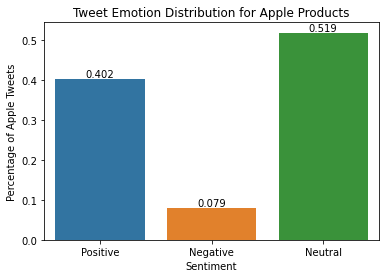

In [51]:
ax = sns.barplot(x = Emotion, y = Apple_Emotion_Dist)
plt.title('Tweet Emotion Distribution for Apple Products')
plt.xlabel('Sentiment')
plt.ylabel('Percentage of Apple Tweets')

for i, v in enumerate(Apple_Emotion_Dist):
    ax.text(i, v, format(v, '.3f'), ha='center', va='bottom')

Most tweets regarding to Apple products are positive (40.2%), follow by negative (7.9%), and neutral (51.9%). 

Almost more than half of the tweets have neutral sentiments.

To futher investigate, we will do NLP modeling to discover some info about the texts to get more insights about what Apple is doing good, and what needs to improve.

Next, we can do the same for Google.
1. Find the positive review counts, negative counts, and neutral counts
2. Sum them out
3. Find the percentages for each emotion. Make a list Google_Emotion_Dist.
4. Visualize distribution.

In [52]:
Google_Pos_Count = len (df [(df['Brand'] == 'Google') & (df['Emotion'] == 'Positive') ])
Google_Neg_Count = len (df [(df['Brand'] == 'Google') & (df['Emotion'] == 'Negative') ])
Google_Neu_Count = len (df [(df['Brand'] == 'Google') & (df['Emotion'] == 'Neutral') ])
Google_total = Google_Pos_Count + Google_Neg_Count + Google_Neu_Count
Google_Pos_percent = Google_Pos_Count / Google_total
Google_Neg_percent = Google_Neg_Count / Google_total
Google_Neu_percent = Google_Neu_Count / Google_total


In [53]:
Google_Emotion_Dist = [Google_Pos_percent, Google_Neg_percent, Google_Neu_percent]
Google_Emotion_Dist

[0.28931904597303837, 0.05254061527825787, 0.6581403387487038]

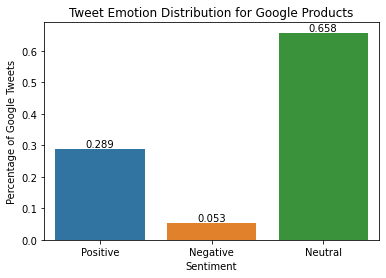

In [54]:
ax = sns.barplot(x = Emotion, y = Google_Emotion_Dist)
plt.title('Tweet Emotion Distribution for Google Products')
plt.xlabel('Sentiment')
plt.ylabel('Percentage of Google Tweets')

for i, v in enumerate(Google_Emotion_Dist):
    ax.text(i, v, format(v, '.3f'), ha='center', va='bottom')


For Google products, positive sentiments are 28.9%, negatives are 5.3%, and neutral are 65.8%.
we can begin NLP preprocessing and do more exploration with WordCloud as for text visualization.

Overall it seems like Apple has greater percentage of positive tweets than Google has. (40.2% vs. 28.9%)
Apple also has less neutral tweets than Google has. (51.9% vs 65.8%)


In [55]:
# Save the cleaned df to a new dataset

In [57]:
# df.to_csv('./Data/Cleaned_tweet_dataset.csv')